<a href="https://colab.research.google.com/github/twotablepush/OpenCV/blob/main/08_Contours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Contours 찾기

cv2.findContours(image, mode, method)
- mode : Contour들을 찾는 방법
 - RETR_EXTERNAL : 바깥쪽 Line만 찾기
 - RETR_LIST : 모든 Line을 찾지만, Hierarchy 구성 X
 - RETR_TREE : 모든 Line을 찾으며, 모든 Hierarchy 구성 O
- method : Contour들을 찾는 근사치 방법
 - CHAIN_APPROX_NONE : 모든 Contour 포인트 저장
 - CHAIN_APPROX_SIMPLE : Contour Line을 그릴 수 있는 포인트만 저장

입력이미지는 Gray Scale Threshold 전처리 과정이 필요하다.

## Contours 그리기

cv2.drawContours(image, contours, contour_index, color, thickness)
- contour_index : 그리고자 하는 Contours Line (전체 : -1)


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving gray.jpg to gray (1).jpg


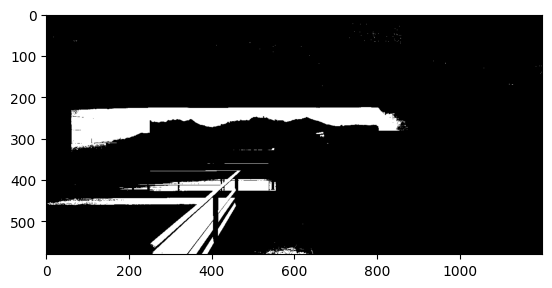

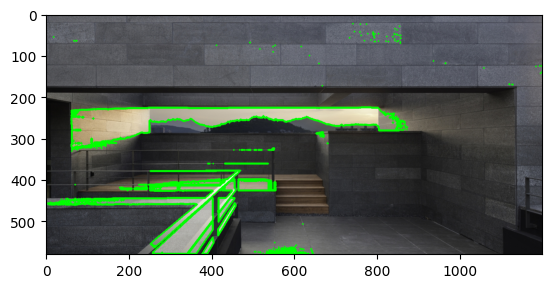

In [ ]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('gray.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(image_gray, 127, 255, 0)

plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB))
plt.show()

contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0]
image = cv2.drawContours(image, contours, -1, (0, 255, 0), 4)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

## Contour의 사각형 외각 찾기

cv2.boundingRect(contour)
- 사각형의 X, Y 좌표와 너비, 높이를 반환


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving number.png to number.png


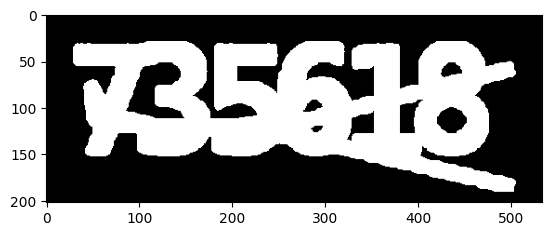

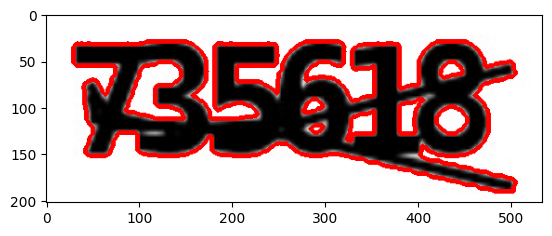

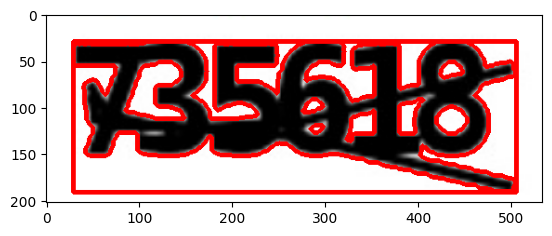

In [ ]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('number.png')
image_number = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(image_number, 230, 255, 0)
thresh = cv2.bitwise_not(thresh)

plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB))
plt.show()

contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0]
image = cv2.drawContours(image, contours, -1, (0, 0, 255), 4)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

contour = contours[0]
x, y, w, h = cv2.boundingRect(contour)
image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 3)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

## Contour의 Convex Hull

cv2.convexHull(contour)
- 대략적인 형태의 Contour 외곽을 빠르게 구할 수 있다. (단일 Contour 반환)



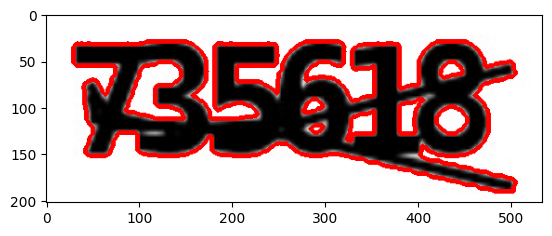

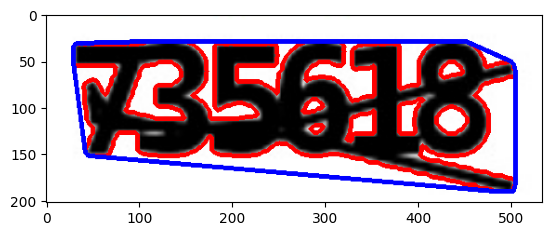

In [ ]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('number.png')
image_number = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(image_number, 230 ,255, 0)
thresh = cv2.bitwise_not(thresh)

contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0]
image = cv2.drawContours(image, contours, -1, (0, 0, 255), 4)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

contour = contours[0]
hull = cv2.convexHull(contour)
image = cv2.drawContours(image, [hull], -1, (255, 0, 0), 4)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

## Contour의 유사 다각형 구하기

cv2. approxPolyDP(curve, epsion, close)
- curve = Contoue
- epsilon : 최대 거리 (클수록 Poin 개수 감소)
- closed : 폐곡선 여부

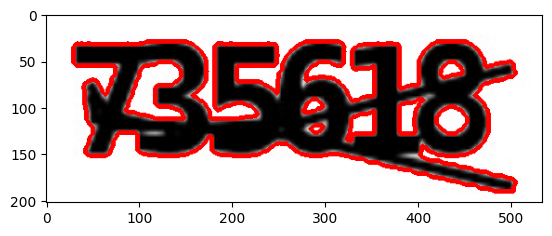

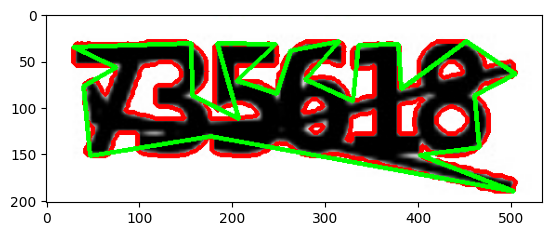

In [ ]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('number.png')
image_number = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(image_number, 230, 255, 0)
thresh = cv2.bitwise_not(thresh)

contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0]
image = cv2.drawContours(image, contours, -1, (0, 0, 255), 4)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

contour = contours[0]
epsilon = 0.01 * cv2.arcLength(contour, True)
approx = cv2.approxPolyDP(contour, epsilon, True)
image = cv2.drawContours(image, [approx], -1, (0, 255, 0), 4)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

## Contour의 기본 정보

cv2.contourArea(contour) : Contour의 면적을 구한다

cv2.arcLength(contour) : Contour의 둘레를 구한다.

cv2.moments(contour) : Contour의 특징을 추출

47049.0
2390.763620734215
{'m00': 47049.0, 'm10': 12677693.166666666, 'm01': 4537436.166666666, 'm20': 4226485080.6666665, 'm11': 1264027501.1666665, 'm02': 504436577.0, 'm30': 1568639796809.6501, 'm21': 429845684310.5, 'm12': 145439791483.46667, 'm03': 61696784854.75, 'mu20': 810389010.0138011, 'mu11': 41382524.985744715, 'mu02': 66843281.35982293, 'mu30': -6947515468.482666, 'mu21': -60927336.00450134, 'mu12': 1533793984.5562973, 'mu03': 155774143.55937958, 'nu20': 0.3660941156745281, 'nu11': 0.01869460061998776, 'nu02': 0.030196524972360247, 'nu30': -0.014469500177105231, 'nu21': -0.00012689257089199696, 'nu12': 0.003194412798627028, 'nu03': 0.0003244287843684536}


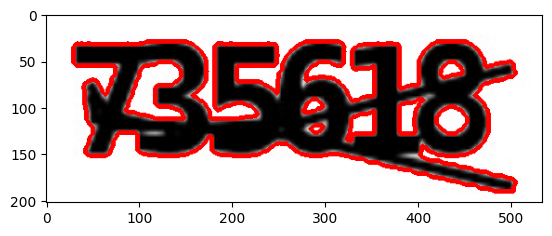

In [ ]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('number.png')
image_number = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(image_number, 230, 255, 0)
thresh = cv2.bitwise_not(thresh)

contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0]
image = cv2.drawContours(image, contours, -1, (0, 0, 255), 4)

contour = contours[0]
area = cv2.contourArea(contour)
print(area)

length = cv2.arcLength(contour, True)
print(length)

M = cv2.moments(contour)
print(M)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()